Installing the libraries

In [1]:
!pip install -q supervision ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 19.4 MB/s eta 0:00:00


Importing all the libraries which is used

In [ ]:
import cv2
import numpy as np
import supervision as sv
from tqdm import tqdm
from ultralytics import YOLO
from collections import defaultdict, deque
import matplotlib.pyplot as plt

In [ ]:
model = YOLO('yolov8n.pt')    # Specifies the pre-trained YOLOv8n (YOLOv8 Nano) model weights to load.
model.train(data="/kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/data.yaml", epochs=50, batch=16, imgsz=1280)
#Trains the YOLO model on the given dataset with the given parameters.

100%|██████████| 6.25M/6.25M [00:00<00:00, 84.9MB/s]


Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 10.9MB/s]
2024-11-20 16:44:44,957	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-20 16:44:45,751	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/train/labels... 102 images, 1 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 276.98it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/labels... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 347.05it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.2G      1.349      4.192      1.094        120       1280: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         28        563     0.0414      0.345     0.0594     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G      1.293      3.293      1.005         85       1280: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         28        563     0.0349      0.543      0.107     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.1G      1.242      2.095      1.001         64       1280: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         28        563     0.0352      0.579       0.11     0.0745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.4G      1.211      1.789      0.998        124       1280: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         28        563     0.0334      0.604      0.108     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.44G      1.217      1.746     0.9927        163       1280: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         28        563     0.0376      0.695      0.265      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.3G      1.172      1.524     0.9892        225       1280: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         28        563     0.0383      0.681      0.255      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.4G      1.136      1.516     0.9805        145       1280: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         28        563      0.563      0.227      0.281      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        10G       1.15      1.419     0.9693        209       1280: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         28        563     0.0687      0.599      0.289      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.1G      1.093      1.379     0.9519        223       1280: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         28        563      0.645      0.168       0.33      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.5G      1.099      1.299     0.9683        201       1280: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         28        563      0.764     0.0793       0.38       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.2G      1.061      1.259     0.9596        160       1280: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         28        563      0.804      0.175      0.452      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.1G      1.116      1.208     0.9678        161       1280: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         28        563       0.62      0.236      0.513      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.2G      1.078      1.172     0.9497        194       1280: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         28        563      0.598      0.273       0.47      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.99G      1.101      1.175     0.9621        171       1280: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         28        563      0.662       0.39      0.506      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.95G      1.091      1.159     0.9688        161       1280: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         28        563      0.617      0.351      0.437      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.2G      1.081      1.185     0.9589        201       1280: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         28        563      0.639      0.524      0.587        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        11G      1.066      1.145     0.9552        160       1280: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         28        563       0.64      0.603      0.603       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G      1.055       1.12     0.9404        155       1280: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         28        563      0.631      0.627       0.59      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.03G      1.053      1.083     0.9474        266       1280: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         28        563       0.62      0.599      0.612      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.6G       1.03      1.063       0.95        128       1280: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         28        563      0.527      0.606      0.593       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.67G      1.009      1.007     0.9269        212       1280: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         28        563      0.503      0.648      0.601      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.4G      1.019      1.026     0.9388        244       1280: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         28        563      0.619      0.657      0.624      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        11G      1.022       1.04     0.9431        146       1280: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         28        563      0.675      0.683       0.67      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G      0.986      1.067     0.9378        104       1280: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         28        563      0.651      0.699      0.681      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.86G      1.007      1.046     0.9306         92       1280: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         28        563       0.63      0.661      0.678       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.4G      1.004     0.9902     0.9351        211       1280: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         28        563      0.668      0.658      0.663      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.1G     0.9868     0.9765     0.9183        143       1280: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         28        563      0.728      0.677      0.681      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.3G      1.006     0.9742     0.9381         81       1280: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         28        563      0.685      0.657       0.66       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.3G      1.001     0.9387     0.9296        215       1280: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         28        563      0.669       0.68      0.651      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.1G      1.019     0.9361     0.9291        197       1280: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         28        563      0.761      0.688      0.737      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.8G     0.9927     0.9821     0.9239         72       1280: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         28        563       0.81      0.637      0.704      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.8G     0.9658     0.9996     0.9264        124       1280: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         28        563      0.694      0.713      0.714      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.1G      1.011     0.9745     0.9331        127       1280: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         28        563      0.786      0.629      0.691      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.53G      1.005       0.97     0.9425         58       1280: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         28        563      0.831      0.645      0.743      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.5G     0.9678     0.9248     0.9173        259       1280: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         28        563      0.836      0.641      0.756       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       9.9G     0.9586      0.934      0.915        193       1280: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         28        563      0.645      0.704      0.721      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.6G     0.9681     0.8743     0.9205        132       1280: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         28        563      0.731      0.682      0.746      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.3G     0.9215     0.8978     0.9148        127       1280: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         28        563       0.69      0.759      0.753      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.7G     0.9644     0.9257     0.9344        179       1280: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         28        563      0.747      0.778      0.786      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.6G      0.936      0.881     0.9176        119       1280: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         28        563      0.763      0.724      0.759      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.86G     0.9519     0.9075     0.9188        115       1280: 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         28        563      0.716      0.759       0.75      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.84G     0.9496     0.8846     0.9135        121       1280: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         28        563       0.77      0.712      0.762       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         28        563      0.793      0.742      0.761      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.53G     0.9432     0.8918     0.9108        100       1280: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         28        563      0.746      0.773      0.775      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.26G     0.9492     0.8707     0.9232        122       1280: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         28        563      0.738      0.769      0.791      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.72G     0.9324     0.8769     0.9144        136       1280: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         28        563      0.806      0.685      0.782       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.99G     0.9329     0.8548     0.9185         81       1280: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         28        563      0.814      0.711      0.773      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.87G     0.9199      0.858     0.9054        129       1280: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         28        563      0.734      0.706      0.774      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.86G     0.9253     0.8549     0.9161        112       1280: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         28        563      0.688      0.734      0.763      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.48G     0.9206     0.8974     0.9117         63       1280: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         28        563      0.698      0.705      0.769      0.534



50 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


                   all         28        563      0.739       0.77      0.791      0.567
                   Bus          6          6      0.562      0.833      0.739      0.622
                   Car         23        398      0.729      0.912      0.889       0.66
            Motorcycle         18         92      0.766      0.772      0.793      0.478
                Pickup         22         59      0.805      0.712      0.796      0.553
                 Truck          8          8      0.832       0.62      0.738      0.521
Speed: 0.7ms preprocess, 9.8ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7effb3e3aad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
# Evaluate the trained model on the validation set
results = model.val()
# Displaying results
print(results)


Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid/labels... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 501.41it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/vehicle-detection-dataset/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


                   all         28        563      0.739      0.769      0.791      0.568
                   Bus          6          6      0.562      0.833      0.739      0.624
                   Car         23        398      0.727      0.911      0.889      0.663
            Motorcycle         18         92      0.767      0.772      0.794      0.483
                Pickup         22         59      0.805      0.712      0.796      0.551
                 Truck          8          8      0.832       0.62      0.736       0.52
Speed: 2.5ms preprocess, 16.7ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7effb3ac7250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_result

Defining the input(source) video path, ouput video path,confidence and IOU  threshold for detection and box selection,model and the resolution for the video frames


In [ ]:
SOURCE_VIDEO_PATH = "/kaggle/input/highway-1/vehicles.mp4"
OUTPUT_VIDEO_PATH = "vehicles-result.mp4"
CONFIDENCE_THRESHOLD = 0.3
IOU_THRESHOLD = 0.5
MODEL_NAME = "/kaggle/working/runs/detect/train/weights/best.pt"    #best weights from the trained model
MODEL_RESOLUTION = 1280

Code for selecting the the coordinates(in sequence of top left-top-right-bottom-right-bottom left) and then press enter.
To be done by the user.


In [ ]:

cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)

# To Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read a single frame from the video
ret, frame = cap.read()

# If a frame was successfully read, proceed
if ret:
    # Initialize an empty list to store coordinates before converting to a NumPy array
    coordinates = []

    # Define the click event
    def click_event(event, x, y, flags, params):
        if event == cv2.EVENT_LBUTTONDOWN:
            # Append the coordinates to the list
            coordinates.append([x, y])
            print(f"Clicked at: ({x}, {y})")

            # Draw a circle at the clicked position
            cv2.circle(frame, (x, y), 5, (255, 0, 0), -1)
            cv2.imshow("Frame", frame)

    # Display the frame and bind the click event
    cv2.imshow("Frame", frame)
    cv2.setMouseCallback("Frame", click_event)

    # Wait indefinitely until a key is pressed
    cv2.waitKey(0)

    # Destroy all OpenCV windows
    cv2.destroyAllWindows()

    # Convert the list of coordinates to a NumPy array
    SOURCE = np.array(coordinates)

    # Display the coordinates in 'SOURCE' array
    print("Collected coordinates (SOURCE array):")
    print(SOURCE)
else:
    print("Error: Could not read the frame from the video.")

# Release the video capture object
cap.release()


Defining actual target(region of interest) coordinates in metre(m) in the given sequence previously.

In [ ]:


TARGET_WIDTH = 25
TARGET_HEIGHT = 180

TARGET = np.array([
    [0, 0],
    [TARGET_WIDTH - 1, 0],
    [TARGET_WIDTH - 1, TARGET_HEIGHT - 1],
    [0, TARGET_HEIGHT - 1],
])
print(TARGET)

[[1189  849]
 [2324  814]
 [3834 1794]
 [  79 1704]]


Getting the first frame

In [ ]:

def get_video_frames_generator(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        yield frame
    cap.release()

# Initialize the frame generator
frame_generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# Get the first frame
frame = next(frame_generator)


Region of Interest

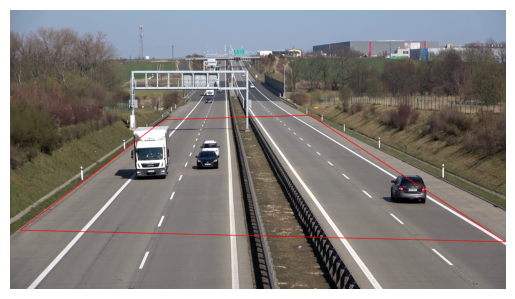

In [ ]:

# Annotate the frame
annotated_frame = frame.copy()

# Draw the polygon
color = (0, 0, 255)  # Red color in BGR format
thickness = 4
cv2.polylines(annotated_frame, [SOURCE], isClosed=True, color=color, thickness=thickness)

# Plot the image
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
plt.axis("off")  # Hide axes
plt.show()


Perspective Tranformation

In [ ]:
#Computes the perspective transformation matrix that maps points from one plane (source) to another (target).
def get_perspective_transform(source: np.ndarray, target: np.ndarray) -> np.ndarray:
    source = source.astype(np.float32)
    target = target.astype(np.float32)
    return cv2.getPerspectiveTransform(source, target)

# Applies a perspective transformation matrix to a set of points to map them from the source plane to the target plane.
def transform_points(points: np.ndarray, transformation_matrix: np.ndarray) -> np.ndarray:
    if points.size == 0:
        return points

    reshaped_points = points.reshape(-1, 1, 2).astype(np.float32)
    transformed_points = cv2.perspectiveTransform(reshaped_points, transformation_matrix)
    return transformed_points.reshape(-1, 2)

transformation_matrix = get_perspective_transform(SOURCE, TARGET)

In [ ]:
import numpy as np
import supervision as sv
from collections import defaultdict, deque
from tqdm import tqdm

# Get the perspective transformation matrix
transformation_matrix = get_perspective_transform(SOURCE, TARGET)

# Setup for ByteTrack and video processing
video_info = sv.VideoInfo.from_video_path(video_path=SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(source_path=SOURCE_VIDEO_PATH)

# tracer initiation
byte_track = sv.ByteTrack(
    frame_rate=video_info.fps, track_activation_threshold=CONFIDENCE_THRESHOLD
)
model = YOLO(MODEL_NAME)

# annotators configuration
thickness = sv.calculate_optimal_line_thickness(resolution_wh=video_info.resolution_wh)
text_scale = sv.calculate_optimal_text_scale(resolution_wh=video_info.resolution_wh)
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=thickness)
label_annotator = sv.LabelAnnotator(
    text_scale=text_scale,
    text_thickness=thickness,
    text_position=sv.Position.BOTTOM_CENTER
)
trace_annotator = sv.TraceAnnotator(
    thickness=thickness,
    trace_length=video_info.fps * 2,
    position=sv.Position.BOTTOM_CENTER
)

# Initialize the PolygonZone with the polygon and the default triggering anchor
polygon_zone = sv.PolygonZone(SOURCE)

coordinates = defaultdict(lambda: deque(maxlen=video_info.fps))

# Vehicle class names 
class_names = {
    0: "Bus",
    1: "Car",
    2: "Motercycle",
    3: "Pickup",
    4: "Truck",

}
# Open target video
with sv.VideoSink(OUTPUT_VIDEO_PATH, video_info) as sink:
    # Loop over source video frame
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Get detection results from the model
        result = model(frame, imgsz=MODEL_RESOLUTION, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(result)

        # Filter out detections by class and confidence
        detections = detections[detections.confidence > CONFIDENCE_THRESHOLD]

        # Filter out detections outside the zone
        detections = detections[polygon_zone.trigger(detections)]

        # Refine detections using non-max suppression
        detections = detections.with_nms(IOU_THRESHOLD)

        # Pass detection through the tracker
        detections = byte_track.update_with_detections(detections=detections)

        # Get anchor points
        points = detections.get_anchors_coordinates(anchor=sv.Position.BOTTOM_CENTER)

        # Calculate the detections position inside the target Region of Interest
        points = transform_points(points=points, transformation_matrix=transformation_matrix).astype(int)

        # Store detections position
        for tracker_id, [_, y] in zip(detections.tracker_id, points):
            coordinates[tracker_id].append(y)

        # Format labels
        labels = []
        for tracker_id, class_id, confidence in zip(detections.tracker_id, detections.class_id, detections.confidence):
            # Fetch the class name
            class_name = class_names.get(class_id, "Unknown")

            # Get the tracker ID and class name
            label = f"#{tracker_id} {class_name} ({confidence:.2f})"  # Format confidence to 2 decimal places

            if len(coordinates[tracker_id]) < video_info.fps / 2:
                labels.append(label)
            else:
            # Calculate speed
                coordinate_start = coordinates[tracker_id][-1]
                coordinate_end = coordinates[tracker_id][0]
                distance = abs(coordinate_start - coordinate_end)
                time = len(coordinates[tracker_id]) / video_info.fps
                speed = distance / time * 3.6  # Speed in km/h

                # Check if the speed is over the threshold
                overspeed_tag = " [Overspeed]" if speed > 110 else ""
                labels.append(f"{label} {int(speed)} km/h{overspeed_tag}")



        # Annotate frame
        annotated_frame = frame.copy()
        annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=detections)
        annotated_frame = bounding_box_annotator.annotate(scene=annotated_frame, detections=detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

        # Add frame to target video
        sink.write_frame(annotated_frame)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
100%|██████████| 538/538 [00:53<00:00, 10.10it/s]
